In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df_train=pd.read_csv('train_t.csv')
df_test=pd.read_csv('test_t.csv')

In [0]:
df=pd.concat([df_train,df_test])

C:\Users\91955\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
#Cabin,Name,Parch,PassengerId,Ticket dosent have much impact on survival rate. we are dropping these columns from dataset


df_new=df.drop(['Cabin','Name','Parch','PassengerId','Ticket'],axis='columns')

In [0]:
df_new.head()

,Age,Embarked,Fare,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,3,male,1,0.0
1,38.0,C,71.2833,1,female,1,1.0
2,26.0,S,7.9250,3,female,0,1.0
3,35.0,S,53.1000,1,female,1,1.0
4,35.0,S,8.0500,3,male,0,0.0


Text(0, 0.5, 'Survival Rate')

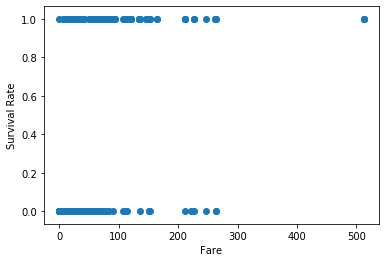

In [0]:
# will see relation between fare and survival rate

plt.scatter(df_new.Fare,df_new.Survived)
plt.xlabel('Fare')
plt.ylabel('Survival Rate')

In [0]:
# relation between Sex and Survival Rate

pd.crosstab(df_new.Sex,df_new.Survived)

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


from above Statistics, we can see that there are more number of females survived then males.

In [0]:
df_new.Sex=df_new.Sex.map({'male':0,'female':1})

In [0]:
df_new.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
df_new.Embarked=df_new.Embarked.map({'S':0,'C':1,'Q':2})

In [0]:
df_new.head()

,Age,Embarked,Fare,Pclass,Sex,SibSp,Survived
0,22.0,0.0,7.2500,3,0,1,0.0
1,38.0,1.0,71.2833,1,1,1,1.0
2,26.0,0.0,7.9250,3,1,0,1.0
3,35.0,0.0,53.1000,1,1,1,1.0
4,35.0,0.0,8.0500,3,0,0,0.0


In [0]:
#Finding null values in each column

df_new.isnull().sum()

Age         263
Embarked      2
Fare          1
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [0]:
# Relation between Age and Pclass

df.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


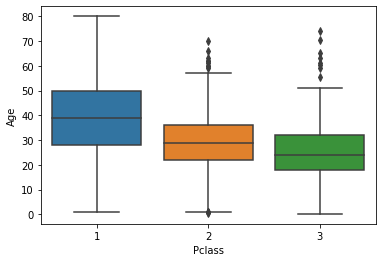

In [0]:
import seaborn as sns
sns.boxplot(x='Pclass',y='Age',data=df_new)

In [0]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age
    

In [0]:
df_new['Age']=df_new[['Age','Pclass']].apply(impute_age,axis=1)

In [0]:
df_new.isnull().sum()

Age           0
Embarked      2
Fare          1
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [0]:
df_new['Survived'].unique()

array([ 0.,  1., nan])

In [0]:
df_new['Survived']=df_new['Survived'].fillna(0)

In [0]:
df_new.isnull().sum()

Age         0
Embarked    2
Fare        1
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [0]:
df_new=df_new.dropna()

In [0]:
y=df_new['Survived']
X=df_new.drop('Survived',axis='columns')

In [0]:
#Splitting train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=10)

In [0]:
# Building model using Decision tree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [0]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
model.score(X_test,y_test)

0.7284894837476099